<a href="https://colab.research.google.com/github/dharshdk/ML/blob/main/KMeans_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv('/content/IRIS.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset['species'],_=pd.factorize(dataset['species'])

In [8]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
X=dataset.iloc[:,[3,4]].values
X

array([[0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.4, 0. ],
       [0.3, 0. ],
       [0.3, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.2, 0. ],
       [0.5, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.3, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.6, 0. ],
       [0.4, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.5,

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

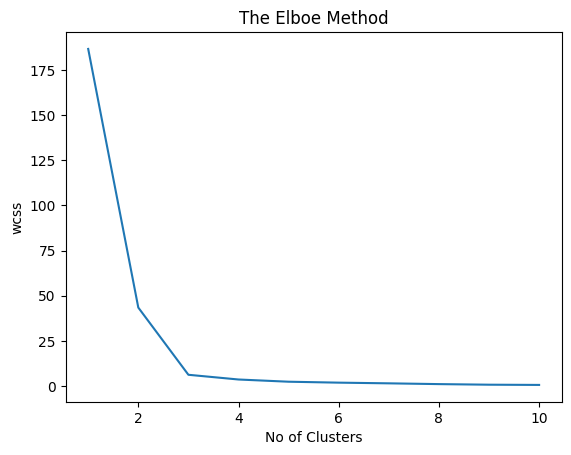

In [11]:
plt.plot(range(1,11),wcss)
plt.title("The Elboe Method")
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

In [15]:
kmeansmodel=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(X)

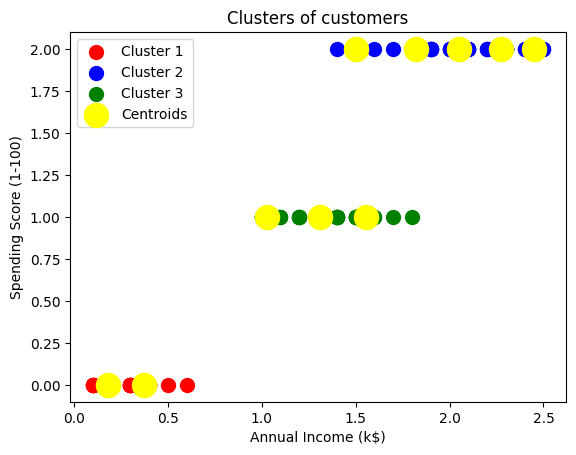

In [17]:
#Visualizing all the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()